In [ ]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns; sns.set() # just makes your plots look prettier run 'pip install seaborn'
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score as accuracy
from keras.models import Sequential
from keras.layers.core import Dense


In [8]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = 10

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.; x_test /= 255.

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 232s 5ms/step - loss: 1.5204 - acc: 0.4435 - val_loss: 1.1684 - val_acc: 0.5856
Epoch 2/10
50000/50000 [==============================] - 235s 5ms/step - loss: 1.1406 - acc: 0.5946 - val_loss: 0.9513 - val_acc: 0.6614
Epoch 3/10
50000/50000 [==============================] - 197s 4ms/step - loss: 0.9805 - acc: 0.6536 - val_loss: 0.8542 - val_acc: 0.6974
Epoch 4/10
50000/50000 [==============================] - 194s 4ms/step - loss: 0.8785 - acc: 0.6904 - val_loss: 0.8130 - val_acc: 0.7192
Epoch 5/10
50000/50000 [==============================] - 194s 4ms/step - loss: 0.8153 - acc: 0.7141 - val_loss: 0.7378 - val_acc: 0.7419
Epoch 6/10
50000/50000 [==============================] - 208s 4ms/step - loss: 0.7616 - acc: 0.7335 - val_loss: 0.7206 - val_acc: 0.7537
Epoch 7/10
50000/50000 [==============================] - 206s 4ms/step - loss: 0.7183 - acc: 0.7463 - val_loss: 0.7129 - 

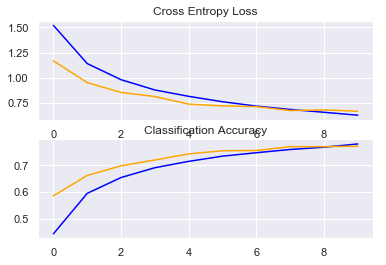

In [9]:
from matplotlib import pyplot

pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')
pyplot.plot(history.history['val_acc'], color='orange', label='test')


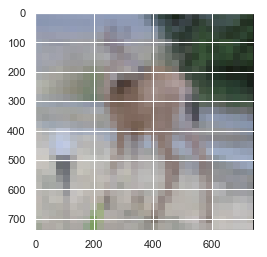

deer


In [22]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(32, 32))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 32, 32, 3)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                 'dog', 'frog', 'horse', 'ship', 'truck']

# prints the image to the screen so you can see that it is in fact a deer
img = mpimg.imread('deer_sample_img.png')
imgplot = plt.imshow(img)
plt.show()

# By putting it through the model again, we can predict the class the image would fall into
image = load_image("deer_sample_img.png")
result = model.predict_classes(image)
print(class_names[result[0]])
